In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("Social_Network_Ads.csv")

In [36]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [37]:
df=df.iloc[:,2:]

In [38]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [42]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [43]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [44]:
X_train.shape

(280, 2)

In [45]:
#Scaling the Data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()
# fit the scaler to the train set, it will learn the parameters like mean variance
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
scaler.mean_

array([3.74642857e+01, 7.19285714e+04])

In [50]:
X_train

,Age,EstimatedSalary
105,21,72000
206,55,130000
243,56,104000
157,29,75000
340,53,104000
...,...,...
345,41,63000
261,36,144000
224,35,60000
151,41,45000


In [51]:
X_train_scaled

array([[-1.61518718e+00,  2.03785210e-03],
       [ 1.72029697e+00,  1.65677375e+00],
       [ 1.81839945e+00,  9.14995591e-01],
       [-8.30367377e-01,  8.76276401e-02],
       [ 1.52409202e+00,  9.14995591e-01],
       [-9.28469852e-01,  3.72926934e-01],
       [-1.12467480e+00,  4.01456863e-01],
       [-1.12467480e+00, -1.05356953e+00],
       [ 1.03357965e+00,  1.34294453e+00],
       [ 2.48759847e-01, -2.64920773e-02],
       [ 3.46862322e-01, -3.68851229e-01],
       [-4.37957477e-01, -8.25330099e-01],
       [ 1.42598955e+00,  1.88501319e+00],
       [-2.41752528e-01, -1.28180897e+00],
       [ 9.35477172e-01, -1.48151847e+00],
       [ 2.01460440e+00, -1.39592869e+00],
       [ 1.13168212e+00,  4.01456863e-01],
       [-1.81139213e+00, -1.31033890e+00],
       [-4.37957477e-01,  2.19884241e+00],
       [-1.90949460e+00,  2.87337146e-01],
       [-1.61518718e+00, -1.12081865e-01],
       [ 1.50657372e-01,  8.76276401e-02],
       [-2.41752528e-01, -2.64920773e-02],
       [ 3.

In [52]:
#X_train_scaled in numpy so we need to conver to rows and col
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [53]:
X_train_scaled

,Age,EstimatedSalary
0,-1.615187,0.002038
1,1.720297,1.656774
2,1.818399,0.914996
3,-0.830367,0.087628
4,1.524092,0.914996
...,...,...
275,0.346862,-0.254732
276,-0.143650,2.056193
277,-0.241753,-0.340321
278,0.346862,-0.768270


In [54]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.5,71928.6
std,10.2,35113.7
min,18.0,15000.0
25%,30.0,45000.0
50%,37.0,71000.0
75%,45.0,89000.0
max,60.0,150000.0


In [56]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.0,-0.0
75%,0.7,0.5
max,2.2,2.2


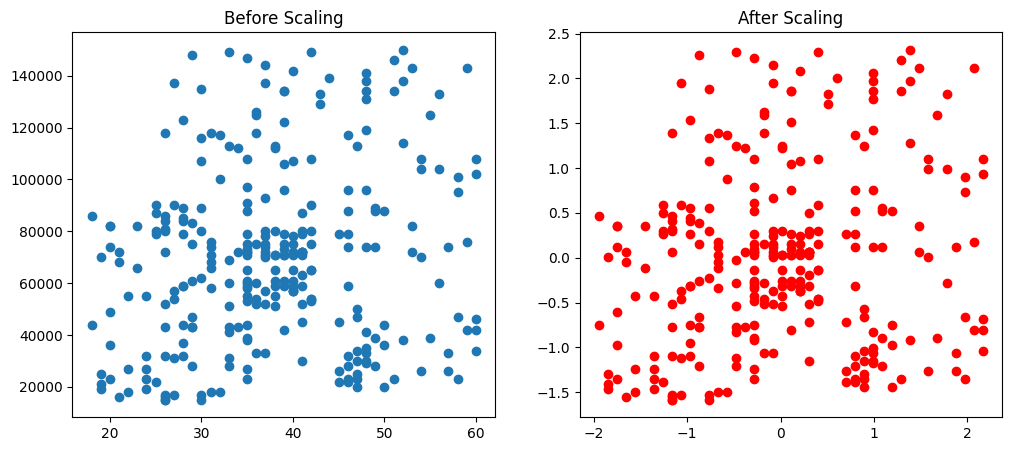

In [81]:
#EFFECTS OF SCALING
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

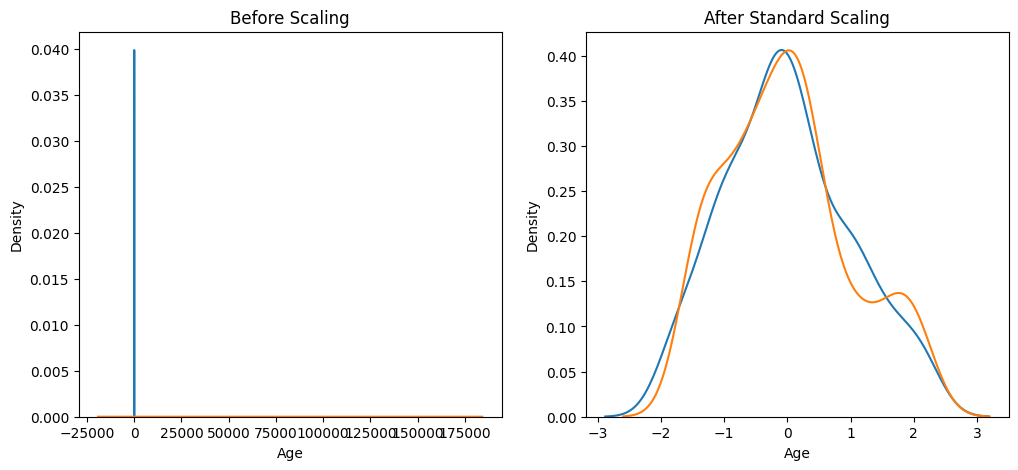

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

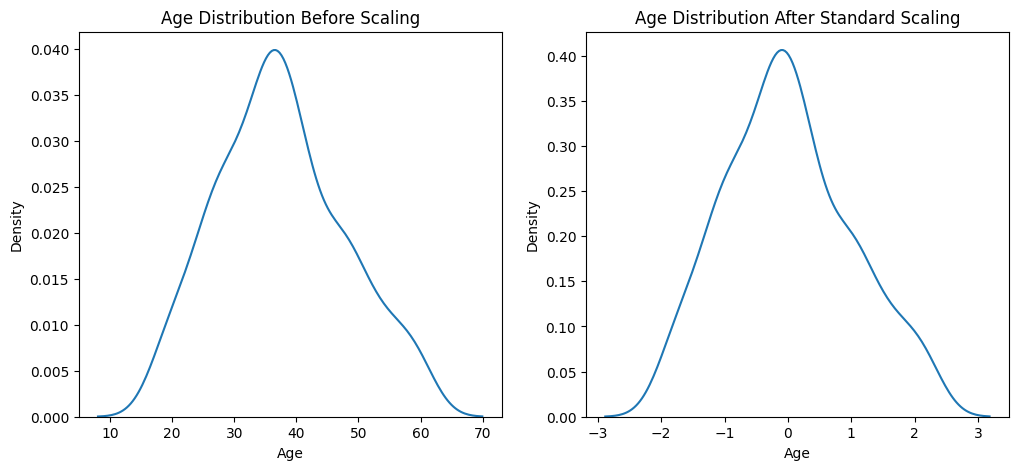

In [60]:
#Comparison of Distributions

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show() 

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [63]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [64]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.825
Scaled 0.825


In [67]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [72]:
df = pd.DataFrame(df)

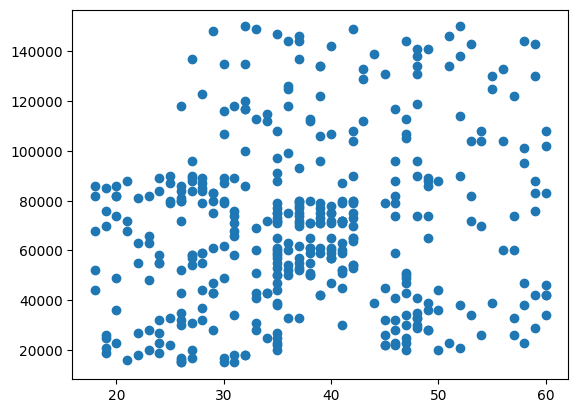

In [74]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [75]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

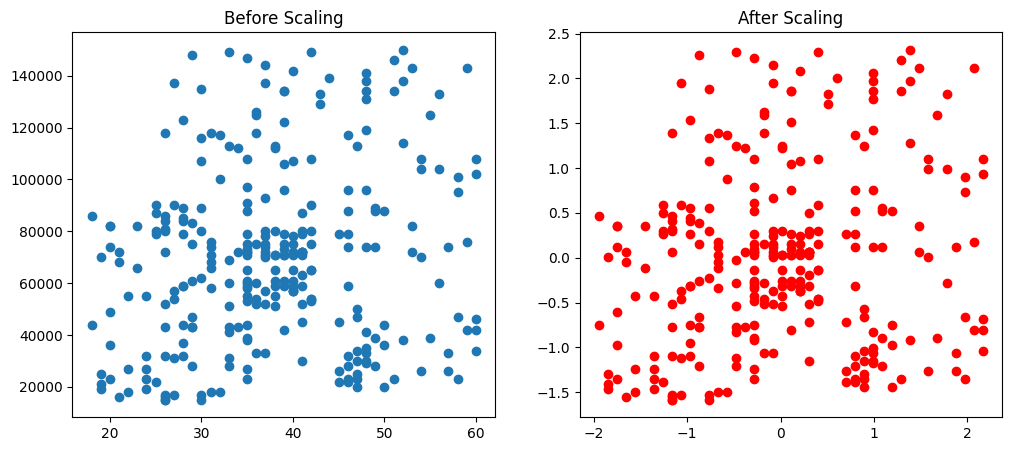

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()